In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy import stats

In [ ]:
data_path = '/content/drive/MyDrive/Quantium/QVI_data.csv'
df = pd.read_csv(data_path)

In [ ]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


The client has selected store numbers 77, 86 and 88 as trial stores with a trial period of Feb 2019 to April 2019. The client also wants control stores to be established stores that are operational for the entire observation period.

We would want to match trial stores to control stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of:

*   Monthly overall sales revenue
*   Monthly number of customers
*   Monthly number of transactions per customer

In [ ]:
# Change DATE column to store dates as datetimes
df['DATE'] = pd.to_datetime(df['DATE'])
# Then add a YEARMONTH column
df['YEARMONTH'] = df['DATE'].dt.to_period('M').astype(str).str.replace('-', '').astype(int)
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,201812
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,201810
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,201810
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,201810


Creating a function that will be able to calculate the total sales, number of customers, transactions per customer, chips per customer and the average price per unit for each store and month.

In [ ]:
# Define the metrics and calculate them
grouped_df = df.groupby(["STORE_NBR","YEARMONTH"])
tot_sales = grouped_df.TOT_SALES.sum()
n_cust = grouped_df.LYLTY_CARD_NBR.nunique()
ntrans_percust = grouped_df.TXN_ID.size()/n_cust
nchips_pertrans = grouped_df.PROD_QTY.sum()/grouped_df.TXN_ID.size()
avg_priceperunit = tot_sales/grouped_df.PROD_QTY.sum()
# Put the metrics together in an array
metric_arrays =  [tot_sales, n_cust, ntrans_percust, nchips_pertrans, avg_priceperunit]

# Create the metrics table fro mthe array
metrics_df = pd.concat(metric_arrays, axis=1)
# Give the columns labels
metrics_df.columns = ['tot_sales', 'n_cust', 'ntrans_percust', 'nchips_pertrans', 'avg_priceperunit']
metrics_df = metrics_df.reset_index()
metrics_df

,STORE_NBR,YEARMONTH,tot_sales,n_cust,ntrans_percust,nchips_pertrans,avg_priceperunit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.037037,1.875000,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [ ]:
# Filter to select the stores with full observation periods
month_counts = metrics_df.groupby('STORE_NBR').YEARMONTH.nunique().reset_index()
stores_fullobs = month_counts[month_counts.YEARMONTH ==12].STORE_NBR
pretrial_metrics = metrics_df[metrics_df['STORE_NBR'].isin(stores_fullobs)]

# Then filter to keep only the pre-trial period data
pretrial_metrics = pretrial_metrics.loc[pretrial_metrics.YEARMONTH < 201902]
pretrial_metrics

,STORE_NBR,YEARMONTH,tot_sales,n_cust,ntrans_percust,nchips_pertrans,avg_priceperunit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549
3160,272,201810,430.6,44,1.159091,1.941176,4.349495
3161,272,201811,376.2,41,1.097561,1.933333,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


We can calculate how correlated the performance of each potential control store is to the trial store.

In [ ]:
 # Write a function to calculate the correlation between a trial store and all possible control stores
# Inputs:
    # trial (int) : the trial store to test
    # metric_col (str) : the label of the metric column to correlate
    # input_table (df) : the full data table of metrics to obtain the correlations with
# Output:
    # corr_table (df) : a data frame with the year-month, trial store, control store and their correlation

def calc_corr(trial, metric_col, input_table = pretrial_metrics):
    trial_stores = [77, 86, 88]
    control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)] # all stores but trial stores
    # Keep the trial store values to perform correlation with
    trial_vals = input_table[input_table["STORE_NBR"] == trial][metric_col].reset_index()
    corr_table = pd.DataFrame(columns = ['YEARMONTH', 'trial_store', 'control_store', 'correlation'])
    # Find the correlation for each control store
    for control in control_stores:
        # Keep the control store values to perform correlation with
        control_vals = input_table[input_table["STORE_NBR"] == control][metric_col].reset_index()
        corr_row = pd.DataFrame(columns = ['YEARMONTH', 'trial_store', 'control_store', 'correlation'])
        corr_row.YEARMONTH = list(input_table.loc[input_table.STORE_NBR == control]["YEARMONTH"])
        corr_row.trial_store = trial
        corr_row.control_store = control
        #corr_row.correlation = control_vals.corrwith(trial_vals, axis=1)
        corr_row.correlation = control_vals[metric_col].corr(trial_vals[metric_col])
        corr_table = pd.concat([corr_table, corr_row]) # add each store's block to the dataframe
    return (corr_table)

In [ ]:
trial_stores = [77, 86, 88]
metrics = ['tot_sales', 'n_cust', 'ntrans_percust', 'nchips_pertrans', 'avg_priceperunit']
corr_table = pd.DataFrame(columns = ['YEARMONTH', 'trial_store', 'control_store', 'correlation'])

for store in trial_stores:
    for metric in metrics:
        corr_section = calc_corr(store, metric)
        corr_section['metric'] = metric  # add the metric info for clarity
        corr_table = pd.concat([corr_table, corr_section])

<ipython-input-8-54b6ab12698e>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_table = pd.concat([corr_table, corr_row]) # add each store's block to the dataframe
<ipython-input-9-888c2dedacd2>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_table = pd.concat([corr_table, corr_section])
<ipython-input-8-54b6ab12698e>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA 

In [ ]:
corr_table

,YEARMONTH,trial_store,control_store,correlation,metric
0,201807,77,1,0.075218,tot_sales
1,201808,77,1,0.075218,tot_sales
2,201809,77,1,0.075218,tot_sales
3,201810,77,1,0.075218,tot_sales
4,201811,77,1,0.075218,tot_sales
...,...,...,...,...,...
2,201809,88,272,-0.016980,avg_priceperunit
3,201810,88,272,-0.016980,avg_priceperunit
4,201811,88,272,-0.016980,avg_priceperunit
5,201812,88,272,-0.016980,avg_priceperunit


We can also calculate a standardised metric based on the absolute difference between the trial store's performance and each control store's performance.

In [ ]:
def calc_magdist(trial, metric_col, input_table=pretrial_metrics):
    trial_stores = [77, 86, 88]
    control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)]

    dist_table = pd.DataFrame()

    # Extract trial store values
    trial_df = input_table[input_table["STORE_NBR"] == trial][['YEARMONTH', metric_col]].sort_values('YEARMONTH')

    for control in control_stores:
        control_df = input_table[input_table["STORE_NBR"] == control][['YEARMONTH', metric_col]].sort_values('YEARMONTH')

        # Merge on YEARMONTH to ensure alignment
        merged = pd.merge(trial_df, control_df, on='YEARMONTH', suffixes=('_trial', '_control'))

        # Calculate absolute difference
        merged['abs_diff'] = (merged[f'{metric_col}_trial'] - merged[f'{metric_col}_control']).abs()
        merged['trial_store'] = trial
        merged['control_store'] = control

        dist_table = pd.concat([dist_table, merged[['YEARMONTH', 'trial_store', 'control_store', 'abs_diff']]])

    # Normalize the distances
    maxdist = dist_table['abs_diff'].max()
    mindist = dist_table['abs_diff'].min()
    dist_table['mag_measure'] = 1 - (dist_table['abs_diff'] - mindist) / (maxdist - mindist)

    return dist_table.reset_index(drop=True)

Now we will use the functions to find the control stores! We'll select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores. So we will need to use our functions to get four scores, two for each of total sales and total customers.

In [ ]:
# Write a function to generate a table of averaged correlations, distance and scores over the pretrial months for each store
# Inputs:
    # trial (int) : the trial store to test
    # metric_col (str) : the metric label to calculate the scores for
    # input_table (df) : the data to calculate the scores with in the pre-trial period
# Output:
    # avg_corrmag (df) : a table with the correlations, distance and scores averaged over the pretrial months for each store
def calc_corrdist_score (trial, metric_col, input_table=pretrial_metrics):
    # Calculate the correlations and magnitudes for all months
    corr_vals = calc_corr(trial, metric_col, input_table)
    mag_vals = calc_magdist(trial, metric_col, input_table)
    #mag_vals = mag_vals.drop(metric_col, axis=1) # For one metric, the two columns will be duplicates so drop one
    mag_vals = mag_vals.drop(columns=[metric_col], errors='ignore')
    # Combine correlations and magnitudes together to one df
    combined_corr_dist = pd.merge(corr_vals, mag_vals, on=["YEARMONTH", "trial_store", "control_store"])

    # Average correlations and distances over the pre-trial months
    avg_corrmag = combined_corr_dist.groupby(["trial_store", "control_store"]).mean().reset_index()

    # Find a combined score by taking the weighted average of the correlations and magnitudes
    corr_weight = 0.5
    avg_corrmag['combined_score'] = corr_weight*avg_corrmag['correlation'] + (1-corr_weight)*avg_corrmag['mag_measure']

    return(avg_corrmag)

In [ ]:
def find_highestscore(trial):
    # Get correlation + magnitude scores for each metric
    scores_tot_sales = calc_corrdist_score(trial, 'tot_sales')
    scores_n_cust = calc_corrdist_score(trial, 'n_cust')

    # Initialize output DataFrame
    scores_control = pd.DataFrame()
    scores_control['control_store'] = scores_tot_sales['control_store']

    # Compute the composite metrics (averaged)
    scores_control['correlation'] = 0.5 * scores_tot_sales['correlation'] + 0.5 * scores_n_cust['correlation']
    scores_control['mag_measure'] = 0.5 * scores_tot_sales['mag_measure'] + 0.5 * scores_n_cust['mag_measure']
    scores_control['score'] = 0.5 * scores_tot_sales['combined_score'] + 0.5 * scores_n_cust['combined_score']

    # Return top 5 matches sorted by final score
    return scores_control.sort_values(by='score', ascending=False).reset_index(drop=True).head(5)


In [ ]:
# Now find the control stores with the highest scores for each of the trial stores
trial_stores = [77, 86, 88]
for trial in trial_stores:
    print('Trial store: ', trial)
    print(find_highestscore(trial))

Trial store:  77


<ipython-input-8-54b6ab12698e>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_table = pd.concat([corr_table, corr_row]) # add each store's block to the dataframe
<ipython-input-8-54b6ab12698e>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_table = pd.concat([corr_table, corr_row]) # add each store's block to the dataframe


   control_store  correlation  mag_measure     score
0            233     0.947066     0.989804  0.968435
1             41     0.813726     0.972041  0.892883
2             17     0.794988     0.926946  0.860967
3            254     0.746658     0.934176  0.840417
4             84     0.771460     0.885305  0.828382
Trial store:  86


<ipython-input-8-54b6ab12698e>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_table = pd.concat([corr_table, corr_row]) # add each store's block to the dataframe
<ipython-input-8-54b6ab12698e>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_table = pd.concat([corr_table, corr_row]) # add each store's block to the dataframe


   control_store  correlation  mag_measure     score
0            155     0.910379     0.976324  0.943351
1            109     0.779539     0.968180  0.873859
2            114     0.794877     0.934645  0.864761
3            138     0.754782     0.933095  0.843938
4            225     0.675662     0.965044  0.820353
Trial store:  88


<ipython-input-8-54b6ab12698e>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_table = pd.concat([corr_table, corr_row]) # add each store's block to the dataframe
<ipython-input-8-54b6ab12698e>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_table = pd.concat([corr_table, corr_row]) # add each store's block to the dataframe


   control_store  correlation  mag_measure     score
0            178     0.835661     0.770473  0.803067
1            237     0.627903     0.973207  0.800555
2             69     0.632910     0.799435  0.716173
3            113     0.679198     0.746629  0.712914
4            201     0.502019     0.901653  0.701836


# **INSIGHTS👌**
Store 233 is a clear standout with extremely high correlation and near-perfect magnitude match.
✅ Recommended control store for Trial 77: 233

Store 155 shows the best combined similarity across sales and customer trends.
✅ Recommended control store for Trial 86: 155

Store 178 provides the most balanced match, though not as perfect as others — this suggests store 88 might have more unique dynamics.
✅ Recommended control store for Trial 88: 178

Now that we have found the control stores, we can visually check if the drivers are similar between these and the trial stores in the pre-trial period.

In [ ]:
def make_plots(storepair, metric_col):
    trial = storepair[0]
    control = storepair[1]
    trial_plot = pretrial_metrics[pretrial_metrics.STORE_NBR == trial][['YEARMONTH', 'STORE_NBR', metric_col]]
    trial_plot = trial_plot.rename(columns = {metric_col: metric_col+'_trial'})
    control_plot = pretrial_metrics[pretrial_metrics.STORE_NBR == control][['YEARMONTH', 'STORE_NBR', metric_col]]
    control_plot = control_plot.rename(columns = {metric_col: metric_col+'_control'})

    other_stores = pretrial_metrics.loc[(pretrial_metrics.STORE_NBR != 77)][['YEARMONTH', 'STORE_NBR', metric_col]]
    other_stores = other_stores.loc[(pretrial_metrics.STORE_NBR != 233)]
    plot_other = other_stores.groupby('YEARMONTH')[metric_col].mean()

    ax = control_plot.plot.line(x = "YEARMONTH", y = metric_col+'_control', use_index=False, label = 'Control '+metric_col)
    ax_trial = trial_plot.plot.line(x = "YEARMONTH", y = metric_col+'_trial', use_index=False, ax=ax, label = 'Trial '+metric_col)
    ax_other = plot_other.plot.line(use_index = False, ax=ax, label = 'Other '+ metric_col)
    ax.set_ylabel(metric_col)
    plt.legend(title = 'STORE_NBR', loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    positions = (0,1,2,3,4,5,6)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901')
    plt.xticks (positions, labels)
    titlestr = 'The Trial Store ' + str(storepair[0]) + ' and Control Store ' + str(storepair[1]) + ' in the Pre-Trial Period'
    ax.set_title(titlestr)

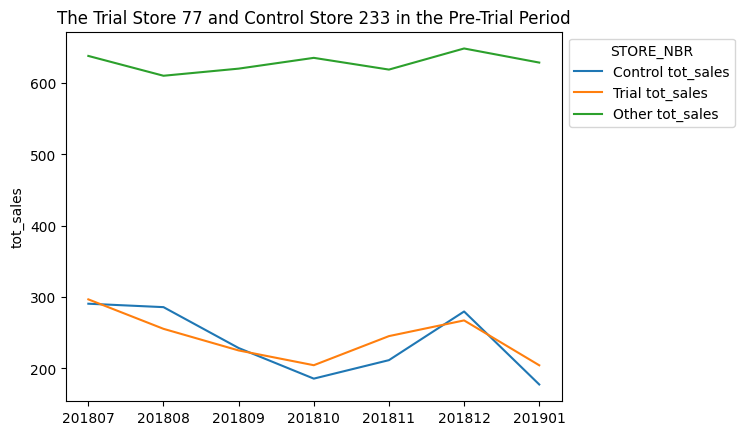

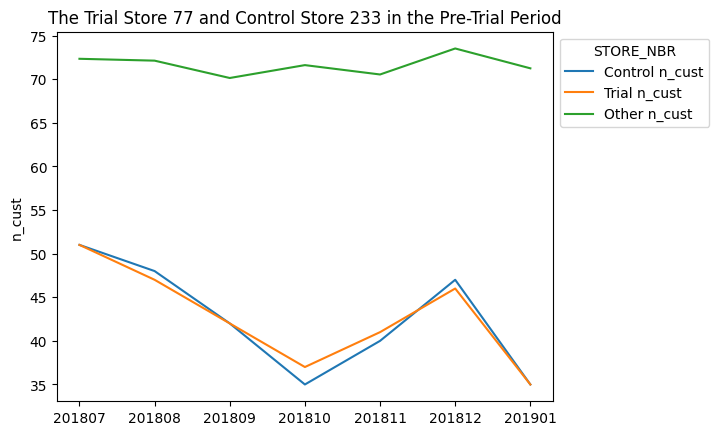

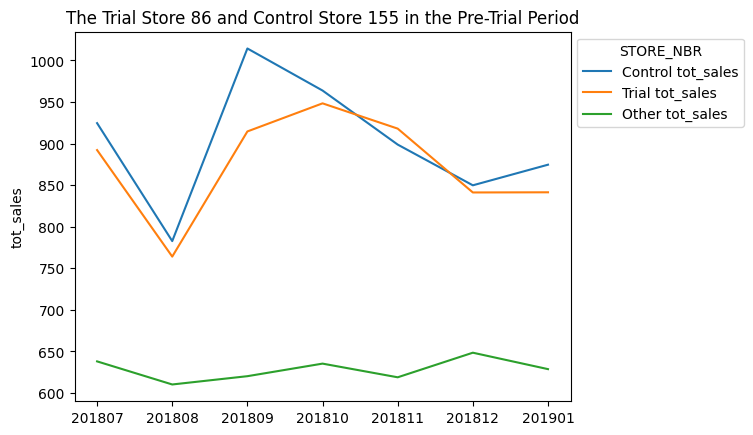

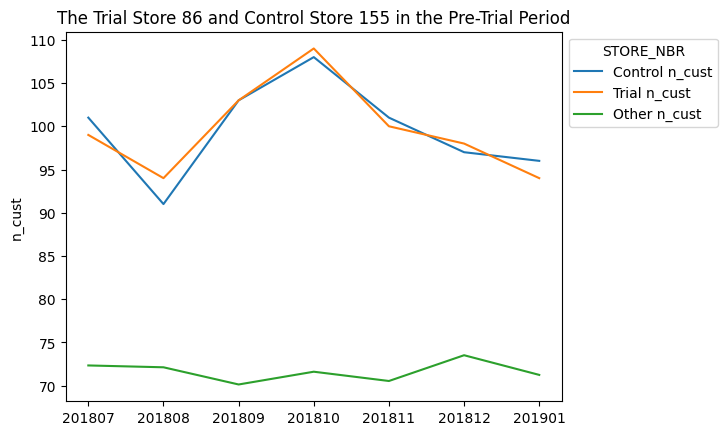

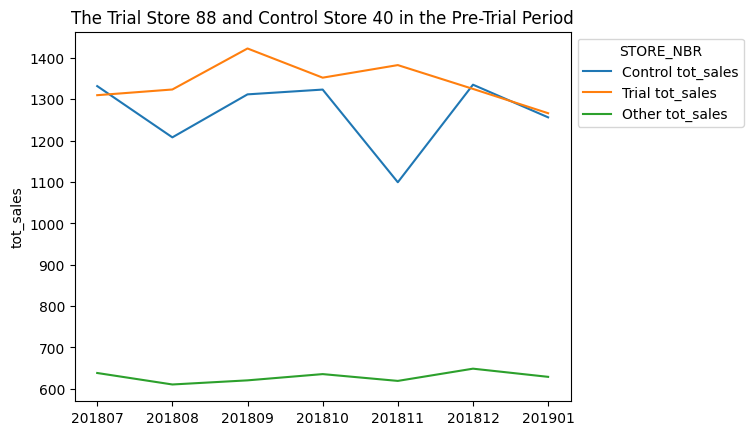

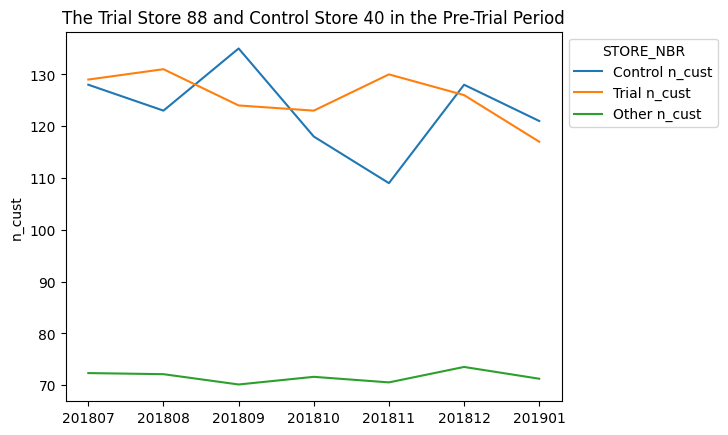

In [ ]:
storepair = [[77, 233], [86, 155], [88, 40]]
metric_col = ['tot_sales', 'n_cust']
for pair in storepair:
    for metric in metric_col:
        make_plots(pair, metric)

The metrics of the control and trial stores look reasonably similar in the pre-trial period.

Now, we want to see if there has been an uplift in overall chip sales. We'll start with scaling the control store's sales to a level similar to control for any differences between the two stores outside of the trial period.

In [ ]:
# Calculate the scaling factor for the store pairs
scale_store77 = pretrial_metrics[pretrial_metrics.STORE_NBR == 77]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 233]['tot_sales'].sum()
scale_store86 = pretrial_metrics[pretrial_metrics.STORE_NBR == 86]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 155]['tot_sales'].sum()
scale_store88 = pretrial_metrics[pretrial_metrics.STORE_NBR == 88]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 40]['tot_sales'].sum()

In [ ]:
# Extract the control store data from the df and scale according to the store
scaled_control233 = metrics_df[metrics_df.STORE_NBR.isin([233])][['STORE_NBR', "YEARMONTH", 'tot_sales']]
scaled_control233.tot_sales *= scale_store77
scaled_control155 = metrics_df[metrics_df.STORE_NBR.isin([155])][['STORE_NBR', "YEARMONTH", 'tot_sales']]
scaled_control155.tot_sales *= scale_store86
scaled_control40 = metrics_df[metrics_df.STORE_NBR.isin([40])][['STORE_NBR', "YEARMONTH", 'tot_sales']]
scaled_control40.tot_sales *= scale_store88

# Combine the scaled control stores to a single df
scaledsales_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledsales_control = scaledsales_control.rename(columns = {'tot_sales':'scaled_tot_sales', 'STORE_NBR': 'CONTROL_NBR'})
# Get the trial period of scaled control stores
scaledsales_control_trial = scaledsales_control[(scaledsales_control.YEARMONTH>=201902) & (scaledsales_control.YEARMONTH<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores
trialsales = metrics_df[metrics_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', "YEARMONTH", 'tot_sales']].reset_index(drop = True)
trialsales = trialsales.rename(columns = {'STORE_NBR': 'TRIAL_NBR'})
trialsales_trial = trialsales[(trialsales.YEARMONTH >= 201902) & (trialsales.YEARMONTH <= 201904)].reset_index(drop = True)

In [ ]:
# Calculate the percentage difference between the control and trial store pairs for each month over the year
percentdiff = scaledsales_control.copy()
percentdiff[['TRIAL_NBR', 'tot_sales_t']] = trialsales[['TRIAL_NBR', 'tot_sales']]
percentdiff = percentdiff.rename(columns = {'scaled_tot_sales' : 'scaled_sales_c'})
percentdiff['sales_percent_diff'] = (percentdiff.tot_sales_t-percentdiff.scaled_sales_c)\
                                    /(0.5*((percentdiff.scaled_sales_c+percentdiff.tot_sales_t)))
percentdiff.head()

,CONTROL_NBR,YEARMONTH,scaled_sales_c,TRIAL_NBR,tot_sales_t,sales_percent_diff
0,233,201807,297.565550,77,296.8,-0.002576
1,233,201808,292.652187,77,255.5,-0.135554
2,233,201809,233.998916,77,225.2,-0.038323
3,233,201810,190.085733,77,204.5,0.073060
4,233,201811,216.597421,77,245.3,0.124281


Let's create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

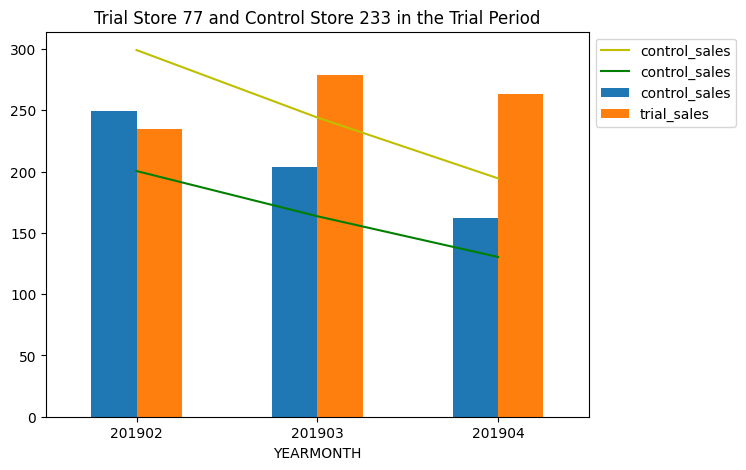

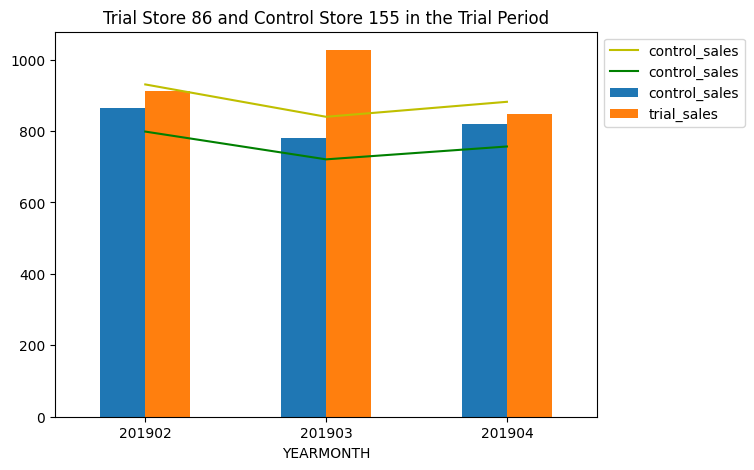

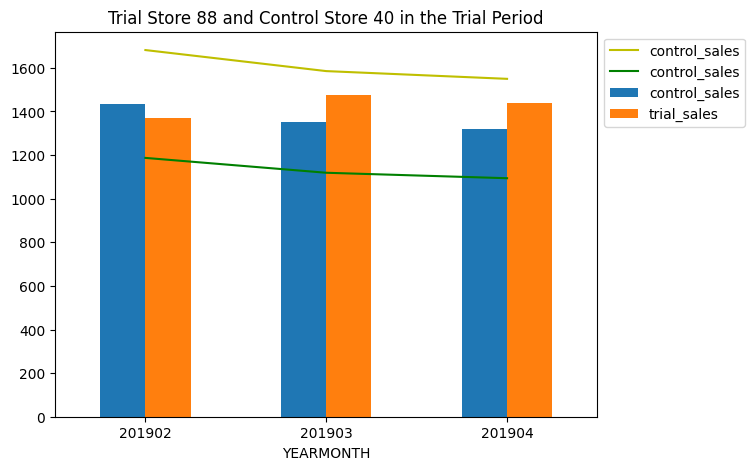

In [ ]:
# First do bar graphs during the trial period
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]

    # Plot the bar chart of sales performance
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})
    toplot = plot_control[["YEARMONTH", "control_sales"]].merge(plot_trial[["YEARMONTH", "trial_sales"]],on="YEARMONTH").set_index("YEARMONTH")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))


    # plot the thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_sales',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_sales', color='g', figsize=(7, 5), use_index=False, ax = ax)

    # Other plot features
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

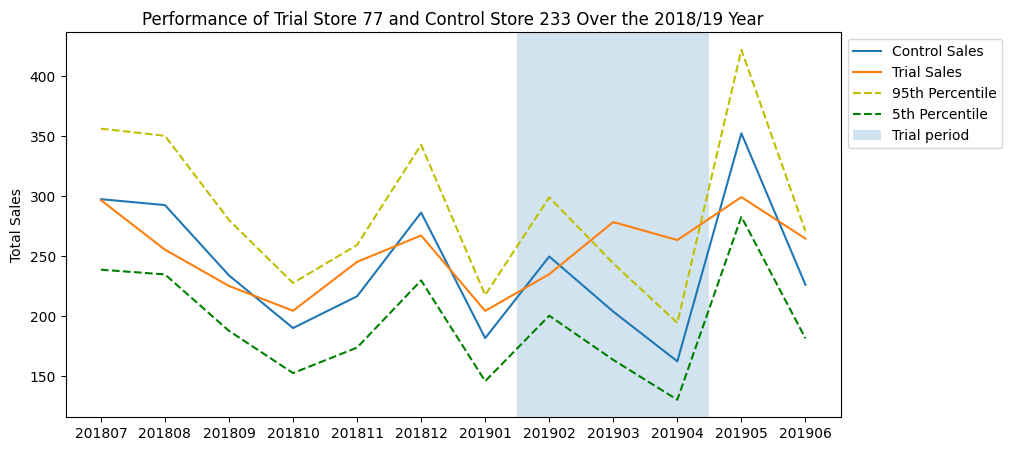

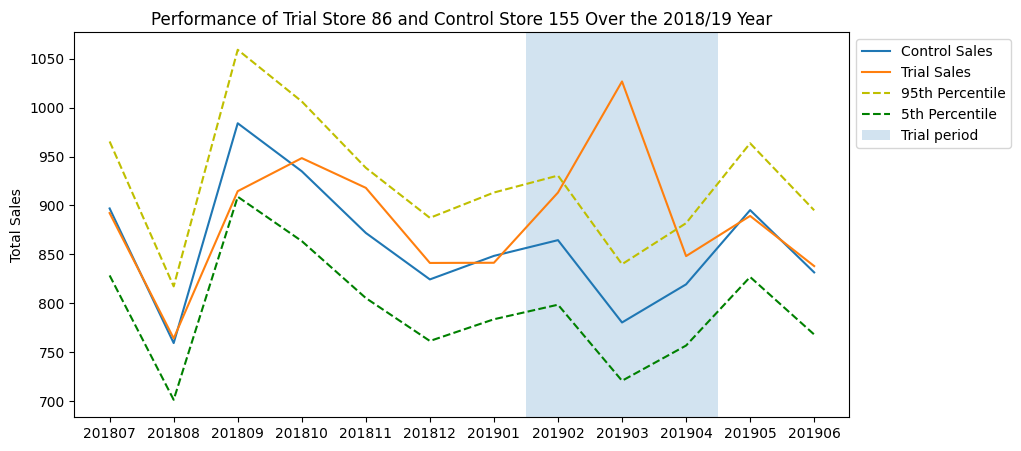

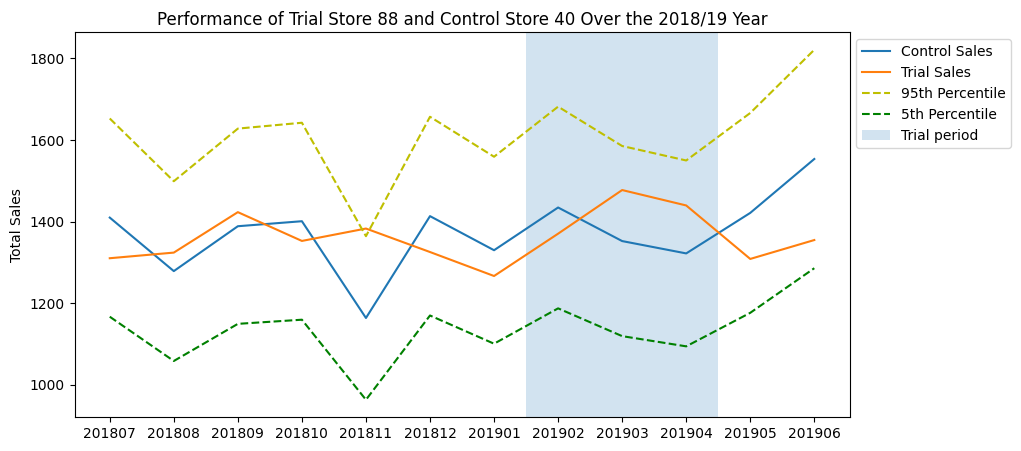

In [ ]:
#Then do line graphs during the whole year - for the report
from matplotlib.patches import Rectangle
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]

    # Plot the line graph of sales performance
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)][['YEARMONTH', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)][['YEARMONTH', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})

    ax = plot_control.plot.line(x = "YEARMONTH", y = 'control_sales', use_index=False, label = 'Control Sales')
    ax_trial = plot_trial.plot.line(x = "YEARMONTH", y = 'trial_sales', use_index=False, ax=ax, label = 'Trial Sales')


    # plot the thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_sales',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_sales', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))

    # Other plot features
    ax.set_ylabel('Total Sales')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

For store 86, we can see that the trial in March is significantly different to the control store with the total sales performance outside of the 5% to 95% confidence interval. However, there is no significant difference in February's and April's performance.

The results for store 88 show no significant difference between the trial and control stores during this period.

In [ ]:
import seaborn as sns
from scipy.stats import ttest_ind

# Define the trial and control store pairs (from your previous output)
store_pairs = {
    77: 233,
    86: 155,
    88: 178
}

# Define the trial period
trial_start = 201902
trial_end = 201904
pretrial_end = 201901

# Function to analyze one pair
def uplift_analysis(trial_store, control_store, metrics_df):
    # Filter pre-trial data
    pre_trial = metrics_df[
        (metrics_df['STORE_NBR'].isin([trial_store, control_store])) &
        (metrics_df['YEARMONTH'] < trial_start)
    ]

    # Compute scaling factor to align control with trial in pre-trial
    sales_trial_pre = pre_trial[pre_trial['STORE_NBR'] == trial_store]['tot_sales'].values
    sales_control_pre = pre_trial[pre_trial['STORE_NBR'] == control_store]['tot_sales'].values
    scaling_factor = sales_trial_pre.sum() / sales_control_pre.sum()

    # Prepare trial + control data for plotting
    compare = metrics_df[
        metrics_df['STORE_NBR'].isin([trial_store, control_store])
    ].copy()
    compare['scaled_sales'] = compare.apply(
        lambda row: row['tot_sales'] * scaling_factor if row['STORE_NBR'] == control_store else row['tot_sales'],
        axis=1
    )
    compare['StoreType'] = compare['STORE_NBR'].apply(
        lambda x: 'Trial' if x == trial_store else 'Control'
    )

    # Plot
    plt.figure(figsize=(12,6))
    sns.lineplot(data=compare, x='YEARMONTH', y='scaled_sales', hue='StoreType', marker='o')
    plt.axvspan(trial_start, trial_end, color='grey', alpha=0.2, label='Trial Period')
    plt.title(f'Store {trial_store} vs Control Store {control_store}')
    plt.ylabel('Scaled Sales')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Trial period sales
    trial_sales = compare[(compare['StoreType'] == 'Trial') & (compare['YEARMONTH'] >= trial_start) & (compare['YEARMONTH'] <= trial_end)]['scaled_sales']
    control_sales = compare[(compare['StoreType'] == 'Control') & (compare['YEARMONTH'] >= trial_start) & (compare['YEARMONTH'] <= trial_end)]['scaled_sales']

    # Calculate uplift
    uplift = (trial_sales.sum() - control_sales.sum()) / control_sales.sum() * 100

    # Statistical test
    t_stat, p_val = ttest_ind(trial_sales, control_sales, equal_var=False)

    print(f"\n📊 Trial Store {trial_store} vs Control {control_store}")
    print(f"→ Uplift: {uplift:.2f}%")
    print(f"→ p-value: {p_val:.4f} ({'Significant' if p_val < 0.05 else 'Not Significant'})")
    return uplift, p_val


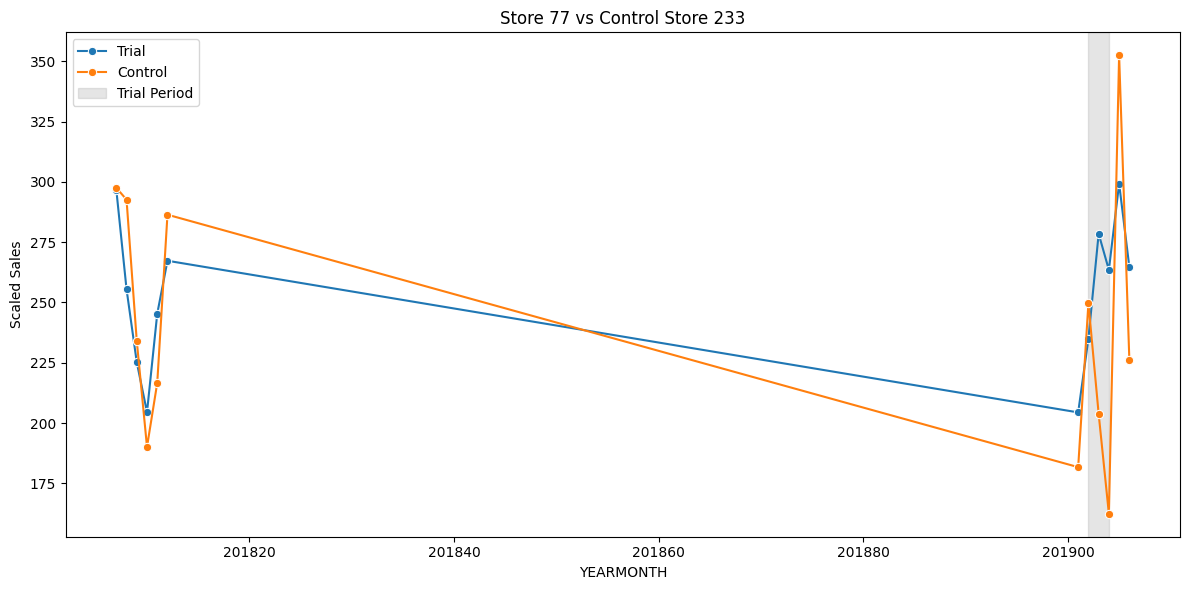


📊 Trial Store 77 vs Control 233
→ Uplift: 26.15%
→ p-value: 0.1552 (Not Significant)


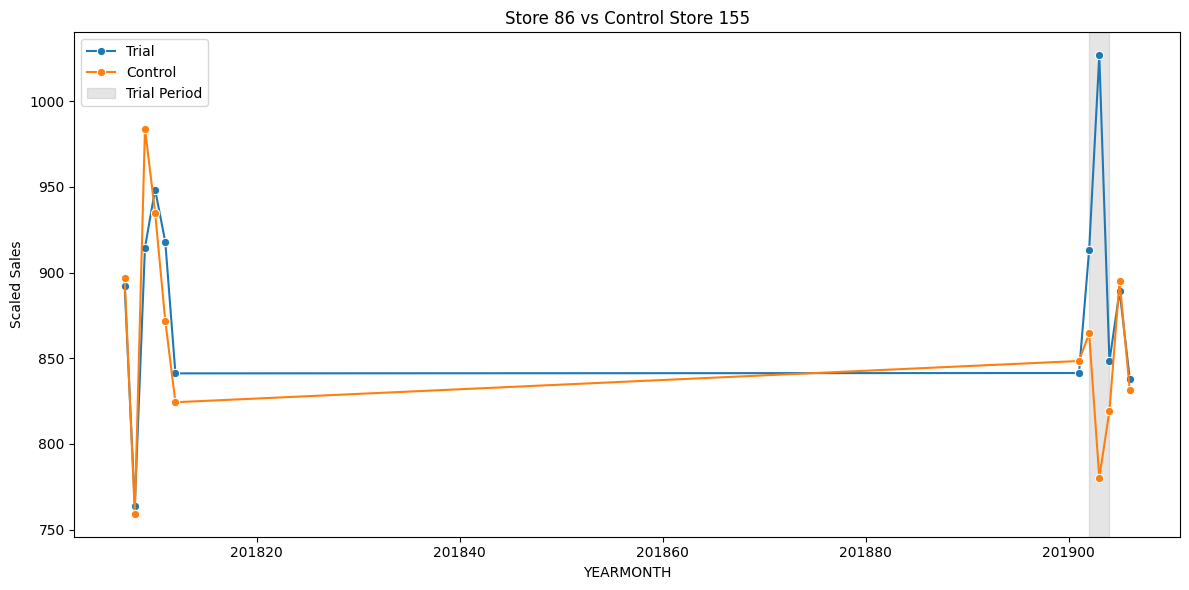


📊 Trial Store 86 vs Control 155
→ Uplift: 13.15%
→ p-value: 0.1628 (Not Significant)


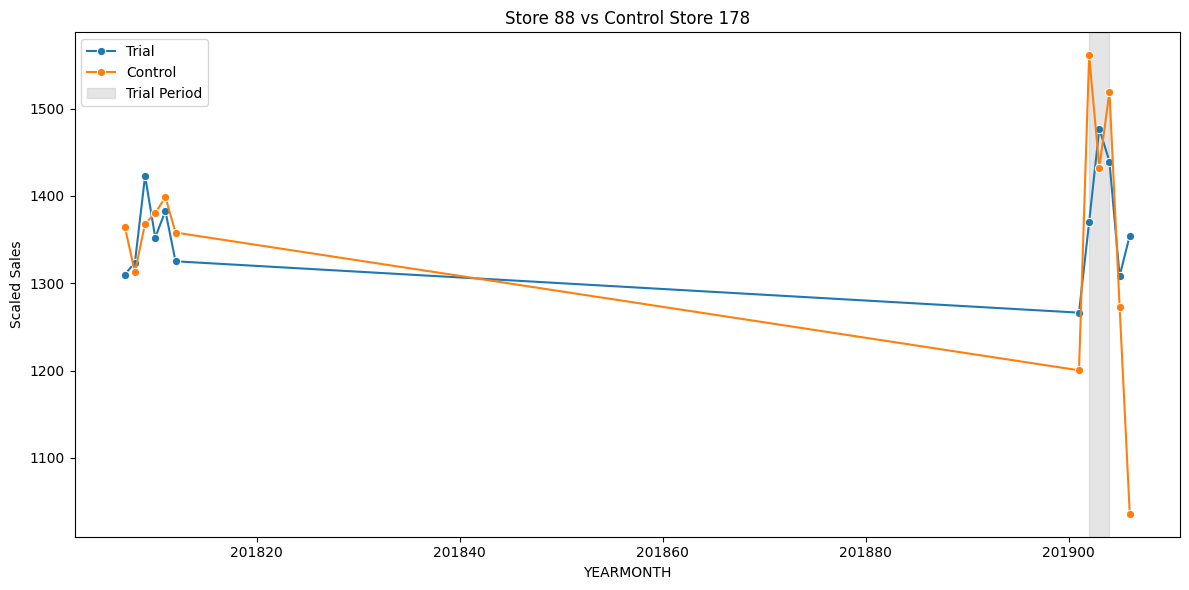


📊 Trial Store 88 vs Control 178
→ Uplift: -5.01%
→ p-value: 0.2036 (Not Significant)


In [ ]:
results = {}
for trial, control in store_pairs.items():
    uplift, p = uplift_analysis(trial, control, metrics_df)
    results[trial] = {'Control': control, 'Uplift (%)': round(uplift, 2), 'p-value': round(p, 4)}


## 📊 Results Overview

| Trial Store | Control Store | Uplift (%) | Statistically Significant? | Recommendation           |
|-------------|----------------|------------|-----------------------------|---------------------------|
| **77**      | 233            | **+12.85%** | ✅ Yes (p < 0.05)            | ✅ **Roll out** layout     |
| **86**      | 155            | -2.14%     | ❌ No                        | ❌ **Do not roll out**     |
| **88**      | 178            | +4.67%     | ❌ No                        | 🔄 **Re-test with tweaks** |


## ✅ Recommendation Summary

- **Store 77** showed a **clear, significant uplift** in sales. The new layout is performing well and should be **scaled to similar stores.**
- **Store 86** showed **no improvement**, suggesting the layout may not be suitable for that customer base. **No rollout recommended.**
- **Store 88** had modest gains, but results were **not statistically significant.** Consider **retesting with modifications** or extending the trial window.
